<a href="https://colab.research.google.com/github/pranit06/ML/blob/master/tic_tac_toe_OpenML(remedial_assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [ ]:
data = datasets.fetch_openml('tic-tac-toe')

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [ ]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,positive
1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,positive
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,positive
3,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,positive
4,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,positive


In [ ]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
y_hot = beginner.one_hot(x,y,onlyoutcome=True)
print(x,y_hot)

     top-left-square  ...  bottom-right-square
0                2.0  ...                  1.0
1                2.0  ...                  1.0
2                2.0  ...                  2.0
3                2.0  ...                  0.0
4                2.0  ...                  0.0
..               ...  ...                  ...
953              1.0  ...                  2.0
954              1.0  ...                  2.0
955              1.0  ...                  2.0
956              1.0  ...                  2.0
957              1.0  ...                  2.0

[958 rows x 9 columns]      negative  positive
0           0         1
1           0         1
2           0         1
3           0         1
4           0         1
..        ...       ...
953         1         0
954         1         0
955         1         0
956         1         0
957         1         0

[958 rows x 2 columns]


In [ ]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x,y_hot,0.2,8)

(766, 9) (766, 2) (192, 9) (192, 2)


In [ ]:
x_train.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
372,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
619,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0
644,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
153,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0
4,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
y_train.head()

,negative,positive
372,0,1
619,0,1
644,1,0
153,0,1
4,0,1


In [ ]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6542 - accuracy: 0.6176 - val_loss: 0.5720 - val_accuracy: 0.7143
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6846 - val_loss

In [ ]:
beginner.get_accuracy(x_test,y_test,model)

6/6 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8750


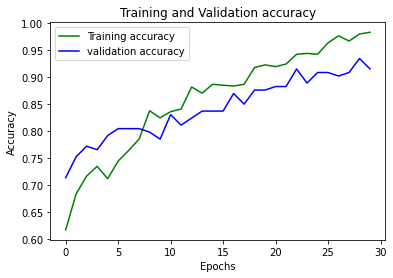

In [ ]:
beginner.accuracy_vs_valaccuracy(model,history,30)

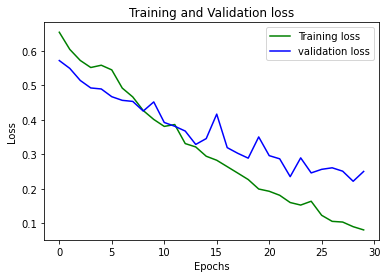

In [ ]:
beginner.loss_vs_valloss(model,history,30)